# LESSON 3: NATURAL LANGUAGE PROCESSING INTRODUCTION
<img src="../images/nlp_logo.jpeg" width="300px"/>

## 1. Overall introduction
Some problems in NLP can be: text classification, text summarization, chatbot, machine translation, image captioning ...

<img src="../images/nlp_text_classification.png" width="400px"/>

<img src="../images/nlp_text_summarization.png" width="400px"/>

<img src="../images/nlp_chatbot.jpeg" width="400px"/>

<img src="../images/nlp_translation.png" width="400px"/>

<img src="../images/cv_problem_4.png" width="400px"/>

## 2. Text processing
### 2.1. Regex

<img src="../images/nlp_regex.webp" width="400px"/>

### 2.2. Tokenizer

<img src="../images/nlp_tokenizer.png" width="400px"/>

### 2.3. Word embedding

<img src="../images/nlp_embedding.png" width="400px"/>

## 3. Recurrent neural network (RNN)
### 3.1. Original RNN

<img src="../images/nlp_rnn.png" width="400px"/>

<img src="../images/nlp_rnn_detail.png" width="400px"/>

### 3.2. Long short-term memory (LSTM)

<img src="../images/nlp_lstm.png" width="400px"/>

- Cell State
- Forget Gate Layer
- Input Gate Layer
- Output Layer Gate

## 4. Attention-based architecture
### 4.1. Attention mechanism

<img src="../images/nlp_attention.png" width="400px"/>

### 4.2. Transformer

<img src="../images/nlp_transformer.png" width="800px"/>

## 5. Simple implementation
### 5.1. Problem

### 5.2. Solution
There are several libraries help us to solve NLP problem. In this lecture, we get started with `nltk`. To install `nltk`, please run `!conda install -c anaconda nltk -y`. After installing, we download a package of `nltk` named `stopwords`.
```python
import nltk
nltk.download('stopwords')
```

In [ ]:
# import nltk
# nltk.download('stopwords')

In [60]:
import os
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.metrics import CategoricalAccuracy
from keras.losses import CategoricalCrossentropy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.layers import (Embedding, Bidirectional, GlobalAveragePooling1D, Dense, Dropout,
                          LSTM, MultiHeadAttention, LayerNormalization, Layer, Input)
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set()

#### Prepare data

In [2]:
df = pd.read_csv(
    '../data/covid19_tweets_dataset/Corona_NLP_train.csv',
    encoding='latin_1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
test_df = pd.read_csv(
    '../data/covid19_tweets_dataset/Corona_NLP_test.csv',
    encoding='latin_1')
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [4]:
df = df.iloc[:100]
test_df = test_df.iloc[:100]

#### Drop unnecessary columns

In [5]:
df = df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
95,Worried about COVID-19? \r\r\n\r\r\nI more wor...,Extremely Positive
96,.@kroger is the biggest supermarket chain in t...,Positive
97,"@kroger Instead of paid sick leave, @kroger is...",Positive
98,I followed this when I went shopping a few day...,Positive


In [6]:
test_df = test_df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])
test_df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
95,The government must provide hand sanitizer in ...,Extremely Positive
96,What You Need If Quarantined at Home | #Corona...,Neutral
97,See the new @FujifilmX_US X-T4 and X100V at Ro...,Extremely Positive
98,Spiking prices during a state of emergency is ...,Extremely Negative


#### Check data balancing

/Users/nguyenhuuminh/opt/miniconda3/envs/mci_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


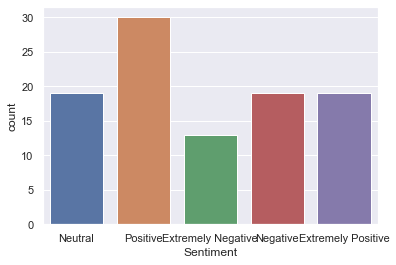

In [7]:
sns.countplot(df['Sentiment'])
plt.show()

/Users/nguyenhuuminh/opt/miniconda3/envs/mci_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


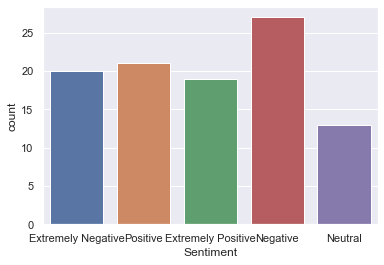

In [8]:
sns.countplot(test_df['Sentiment'])
plt.show()

#### Rename label

In [9]:
replace_label = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

In [10]:
df.Sentiment = df.Sentiment.replace(replace_label)
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
95,Worried about COVID-19? \r\r\n\r\r\nI more wor...,4
96,.@kroger is the biggest supermarket chain in t...,3
97,"@kroger Instead of paid sick leave, @kroger is...",3
98,I followed this when I went shopping a few day...,3


In [11]:
test_df.Sentiment = test_df.Sentiment.replace(replace_label)
test_df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,3
2,Find out how you can protect yourself and love...,4
3,#Panic buying hits #NewYork City as anxious sh...,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,2
...,...,...
95,The government must provide hand sanitizer in ...,4
96,What You Need If Quarantined at Home | #Corona...,2
97,See the new @FujifilmX_US X-T4 and X100V at Ro...,4
98,Spiking prices during a state of emergency is ...,0


#### Clean the sequence

In [12]:
# load stop words
stop_word = stopwords.words('english')

In [13]:
def clean(text):
    # remove urls
    text = re.sub(r'http\S+', ' ', text)

    # remove mentions
    text = re.sub(r'@\w+', ' ', text)

    # remove hastags
    text = re.sub(r'#\w+', ' ', text)

    # remove digits
    text = re.sub(r'\d+', ' ', text)

    # remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    # remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])

    return text

In [14]:
df.OriginalTweet = df.OriginalTweet.apply(lambda x: clean(x))
df

,OriginalTweet,Sentiment
0,,2
1,advice Talk neighbours family exchange phone n...,3
2,Coronavirus Australia: Woolworths give elderly...,3
3,"My food stock one empty... PLEASE, panic, THER...",3
4,"Me, ready go supermarket outbreak. Not I'm par...",0
...,...,...
95,Worried COVID- ? I worried people panicking. H...,4
96,. biggest supermarket chain United States. It ...,3
97,"Instead paid sick leave, providing weeks paid ...",3
98,I followed I went shopping days ago. It's pain...,3


In [15]:
test_df.OriginalTweet = test_df.OriginalTweet.apply(lambda x: clean(x))
test_df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,"When I find hand sanitizer Fred Meyer, I turne...",3
2,Find protect loved ones . ?,4
3,buying hits City anxious shoppers stock food&a...,1
4,One week everyone buying baby milk powder next...,2
...,...,...
95,The government must provide hand sanitizer pub...,4
96,What You Need If Quarantined Home | - Consumer...,2
97,See new X-T X V Roberts! Join us Saturday Marc...,4
98,"Spiking prices state emergency crime, REPORT IT:",0


#### Prepare config

In [16]:

train_val_split_rate = 0.8
lr = 1e-5
lr_factor = 0.1
lr_patience = 2
lr_min = 1e-10
folder_path = 'nlp_example'
train_batch_size = 64
val_batch_size = 128
shuffle_train_set = True
n_epoch = 20

embedding_dim = 16
dense_units_list = [64, 5]
dropout_rate = 0.5
lstm_n_cells = 256
lstm_return_seq = True

#### Split data into train set and val set

In [17]:
df = df.sample(frac=1, random_state=1)

In [18]:
train_df = df.iloc[:int(train_val_split_rate * len(df))]
train_df

,OriginalTweet,Sentiment
80,Check folks So Cal ? I like idea ? La Habra su...,3
84,"Sadly, surprise Heard one payer exec laying lo...",0
33,"Coronavirus fun fact: cough grocery store, get...",4
81,"Love hate it, head advice &amp; Blip lives itÂ...",3
93,"Pretty sure within week two, supermarket suppl...",4
...,...,...
96,. biggest supermarket chain United States. It ...,3
13,"Me: I need stock food, I'll Amazon deliver wha...",3
68,Yeah parents risky people covid thatÂs stay h...,3
85,I work retail I keep stock back older customer...,3


In [19]:
val_df = df.iloc[int(train_val_split_rate * len(df)):]
val_df

,OriginalTweet,Sentiment
29,Soon dwindling supplies unlawful Panicky peopl...,0
28,Do see malicious price increases NYC? The NYC ...,1
11,"Due Covid- situation, increased demand food pr...",4
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",4
20,nations inficted covid world must play fair ch...,0
50,"""Everything weÂre seeing current COVID- outbr...",0
25,UK poll indicates majority expect 's impact la...,4
6,Cashier grocery store sharing insights To prov...,3
71,"Hi, COVID- . Thanks making online shopping.",3
76,"The actions selfish. If I CEO grocery store, -...",0


In [20]:
x_train = train_df.OriginalTweet
x_train

80    Check folks So Cal ? I like idea ? La Habra su...
84    Sadly, surprise Heard one payer exec laying lo...
33    Coronavirus fun fact: cough grocery store, get...
81    Love hate it, head advice &amp; Blip lives itÂ...
93    Pretty sure within week two, supermarket suppl...
                            ...                        
96    . biggest supermarket chain United States. It ...
13    Me: I need stock food, I'll Amazon deliver wha...
68    Yeah parents risky people covid thatÂs stay h...
85    I work retail I keep stock back older customer...
14    ADARA Releases COVID- Resource Center Travel B...
Name: OriginalTweet, Length: 80, dtype: object

In [21]:
y_train = train_df.Sentiment
y_train

80    3
84    0
33    4
81    3
93    4
     ..
96    3
13    3
68    3
85    3
14    3
Name: Sentiment, Length: 80, dtype: int64

In [22]:
x_val = val_df.OriginalTweet
x_val

29    Soon dwindling supplies unlawful Panicky peopl...
28    Do see malicious price increases NYC? The NYC ...
11    Due Covid- situation, increased demand food pr...
18    Amazon Glitch Stymies Whole Foods, Fresh Groce...
20    nations inficted covid world must play fair ch...
50    "Everything weÂre seeing current COVID- outbr...
25    UK poll indicates majority expect 's impact la...
6     Cashier grocery store sharing insights To prov...
71          Hi, COVID- . Thanks making online shopping.
76    The actions selfish. If I CEO grocery store, -...
1     advice Talk neighbours family exchange phone n...
16    ????? ????? ????? ????? ?? ?????? ????? ??????...
64    What K Consumers Told PYMNTS About How COVID- ...
79    As retailers close physical stores curtail hou...
5     As news regionÂs first confirmed COVID- case ...
75    Lost wages either due illness virus economic i...
9     For corona prevention,we stop buy things cash ...
72    Corona scare sends sea-food prices skyrock

In [23]:
y_val = val_df.Sentiment
y_val

29    0
28    1
11    4
18    4
20    0
50    0
25    4
6     3
71    3
76    0
1     3
16    2
64    2
79    3
5     3
75    4
9     1
72    2
12    4
37    3
Name: Sentiment, dtype: int64

In [24]:
x_test = test_df.OriginalTweet
x_test

0     TRENDING: New Yorkers encounter empty supermar...
1     When I find hand sanitizer Fred Meyer, I turne...
2                           Find protect loved ones . ?
3     buying hits City anxious shoppers stock food&a...
4     One week everyone buying baby milk powder next...
                            ...                        
95    The government must provide hand sanitizer pub...
96    What You Need If Quarantined Home | - Consumer...
97    See new X-T X V Roberts! Join us Saturday Marc...
98     Spiking prices state emergency crime, REPORT IT:
99    Besides canned food toilet paper. $KR $TGT $WM...
Name: OriginalTweet, Length: 100, dtype: object

In [25]:
y_test = test_df.Sentiment
y_test

0     0
1     3
2     4
3     1
4     2
     ..
95    4
96    2
97    4
98    0
99    2
Name: Sentiment, Length: 100, dtype: int64

In [26]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 5)
y_val = to_categorical(y_val, 5)

#### Get max length of sequence

In [27]:
max_len = np.max(x_train.apply(lambda x :len(x)))
max_len

245

#### Tokenize sequence

In [28]:
tokenizer = Tokenizer()

In [29]:
tokenizer.fit_on_texts(x_train)

In [30]:
vocab_len = len(tokenizer.word_index) + 1

In [31]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train

[[103, 246, 43, 247, 1, 21, 104, 248, 249, 8, 250, 251, 62, 252, 105, 2, 63],
 [106,
  107,
  253,
  64,
  254,
  255,
  256,
  108,
  257,
  258,
  109,
  259,
  260,
  261,
  110,
  262,
  111],
 [10, 263, 112, 264, 17, 4, 22, 265, 266, 113, 267],
 [268,
  269,
  44,
  270,
  271,
  25,
  272,
  273,
  45,
  274,
  65,
  275,
  114,
  276,
  7,
  18,
  3,
  277,
  115,
  66,
  278,
  116,
  117,
  66,
  118,
  279,
  280],
 [113,
  281,
  282,
  283,
  119,
  8,
  120,
  284,
  285,
  286,
  287,
  2,
  26,
  288,
  23,
  289,
  67,
  43,
  68,
  121,
  290,
  291,
  292,
  5,
  293,
  294,
  1,
  32,
  43],
 [295, 296, 11, 297, 298, 299, 122, 300, 301, 302, 303, 304, 2, 305],
 [123,
  18,
  13,
  69,
  306,
  307,
  124,
  125,
  5,
  8,
  308,
  126,
  46,
  33,
  34,
  127,
  70,
  309,
  310,
  47,
  311,
  18,
  128,
  129,
  71,
  312,
  2,
  313],
 [314,
  35,
  315,
  11,
  316,
  317,
  318,
  319,
  24,
  320,
  63,
  321,
  322,
  14,
  323,
  324,
  26,
  130,
  325,
  32

In [32]:
x_val = tokenizer.texts_to_sequences(x_val)
x_val

[[5, 636, 81, 229, 25, 155, 63, 25],
 [66, 76, 12, 11, 73, 839, 118, 238],
 [20, 2, 141, 40, 3, 197, 12, 376, 116, 209, 15, 199, 599, 456, 24, 51, 116],
 [243, 265, 370, 740, 17, 179, 2, 39, 218, 430, 5, 6, 15, 191],
 [2, 664, 40, 222, 590, 3, 693, 432, 504],
 [129, 2, 85, 218, 7, 34, 3],
 [237, 191, 75, 220, 24, 430, 753, 76, 10, 11, 73],
 [17, 4, 729, 837, 839, 657, 1, 176, 657],
 [2, 166, 15, 6],
 [12, 653, 654, 67, 1, 17, 4, 68, 116, 5, 1, 58, 64, 512],
 [271, 117, 758, 523, 758, 359, 15, 6, 802],
 [],
 [2, 273, 150],
 [336, 360, 229, 62, 2, 442, 21, 17, 212, 838],
 [336, 77, 233, 2, 122, 468, 493, 283, 5, 229, 232, 738, 3, 37, 38, 217, 635],
 [670, 20, 93, 410, 191, 332, 40, 24, 601, 601, 3],
 [29, 436, 24, 709, 18, 347, 118, 15, 436, 39, 687, 15, 6, 41, 631, 116, 2],
 [436, 3, 84, 98, 98],
 [198, 54, 645, 19, 180, 6, 362, 60, 15, 6, 804, 447, 434],
 [192, 191, 2, 148, 60, 145, 440]]

In [33]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test

[[222, 42, 8, 95, 15, 603, 16],
 [443, 1, 213, 738, 1, 69, 103, 84],
 [213, 164, 806, 807],
 [34, 612, 603, 16, 3, 25, 791, 543],
 [64, 283, 28, 34, 753, 28, 34, 37, 38],
 [66, 116, 87, 84, 206, 182, 674, 84],
 [738],
 [24, 114, 709, 143, 84, 789, 829, 25, 474, 405],
 [1,
  1,
  738,
  458,
  1,
  21,
  789,
  470,
  30,
  688,
  192,
  58,
  118,
  30,
  29,
  12,
  58,
  55,
  5],
 [463, 8, 72, 92, 759, 25, 704, 226, 251],
 [520, 108, 84, 802, 24, 29],
 [789, 204, 84, 10],
 [7, 3, 34, 20, 69, 225, 7, 34, 239, 171, 126, 3],
 [92, 17, 4, 136, 10, 90, 738, 142, 1, 13, 18, 229, 44],
 [2, 85, 270, 11, 425],
 [413, 52, 132, 87, 132, 790, 27, 45],
 [156, 555, 2, 284, 425, 489],
 [443, 3, 25, 18, 607, 459, 3, 428, 101, 65, 278],
 [283, 142, 182, 533, 139, 384, 120, 195, 209, 40, 195, 91, 753, 384, 119],
 [21, 330, 72, 785, 21, 686, 11, 745, 94, 185, 456],
 [5, 101, 95, 42, 25, 84],
 [29, 32, 820, 94, 259, 101, 5, 17, 4, 643],
 [670, 189, 202, 145, 145, 101],
 [7, 739, 380, 84, 36, 14, 725],


In [34]:
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_train, x_train.shape

(array([[103, 246,  43, ...,   0,   0,   0],
        [106, 107, 253, ...,   0,   0,   0],
        [ 10, 263, 112, ...,   0,   0,   0],
        ...,
        [816,  70, 817, ...,   0,   0,   0],
        [  1,  50,   9, ...,   0,   0,   0],
        [833, 834,   2, ...,   0,   0,   0]], dtype=int32),
 (80, 245))

In [35]:
x_val = pad_sequences(x_val, maxlen=max_len, padding='post')
x_val, x_val.shape

(array([[  5, 636,  81, ...,   0,   0,   0],
        [ 66,  76,  12, ...,   0,   0,   0],
        [ 20,   2, 141, ...,   0,   0,   0],
        ...,
        [436,   3,  84, ...,   0,   0,   0],
        [198,  54, 645, ...,   0,   0,   0],
        [192, 191,   2, ...,   0,   0,   0]], dtype=int32),
 (20, 245))

In [36]:
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')
x_test, x_test.shape

(array([[222,  42,   8, ...,   0,   0,   0],
        [443,   1, 213, ...,   0,   0,   0],
        [213, 164, 806, ...,   0,   0,   0],
        ...,
        [ 76, 222,  91, ...,   0,   0,   0],
        [ 84,  78,  44, ...,   0,   0,   0],
        [735,   3,  37, ...,   0,   0,   0]], dtype=int32),
 (100, 245))

#### Build simple LSTM model

In [37]:
rnn_model = Sequential([
    Embedding(vocab_len, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(lstm_n_cells, return_sequences=lstm_return_seq)),
    GlobalAveragePooling1D(),
    Dense(dense_units_list[0], activation='relu'),
    Dropout(dropout_rate),
    Dense(dense_units_list[1], activation='softmax')
])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 245, 16)           13472     
_________________________________________________________________
bidirectional (Bidirectional (None, 245, 512)          559104    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 605,733
Trainable params: 605,733
Non-trainable params: 0
__________________________________________________

#### Init loss function

In [38]:
cat_cross_entropy_loss = CategoricalCrossentropy()

#### Init optimizer

In [39]:
rnn_adam_opt = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#### Init callbacks

In [40]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=lr_factor, patience=lr_patience, min_lr=lr_min)

In [41]:
os.system(f'rm -r {folder_path}')
os.mkdir(folder_path)

In [42]:
rnn_checkpoint = ModelCheckpoint(os.path.join(folder_path, 'model/rnn_model_{epoch:02d}.h5'))

#### Init metric

In [43]:
acc = CategoricalAccuracy()

#### Train simple model

In [44]:
rnn_model.compile(loss=cat_cross_entropy_loss, optimizer=rnn_adam_opt, metrics=[acc])

In [45]:
rnn_history = rnn_model.fit(
    x=x_train,
    y=y_train,
    batch_size=train_batch_size,
    epochs=n_epoch,
    validation_data=(x_val, y_val),
    shuffle=shuffle_train_set,
    validation_batch_size=val_batch_size,
    callbacks=[rnn_checkpoint, reduce_lr]
)

Epoch 1/20
2/2 [==============================] - 18s 5s/step - loss: 1.6100 - categorical_accuracy: 0.2146 - val_loss: 1.6089 - val_categorical_accuracy: 0.2500
Epoch 2/20
2/2 [==============================] - 7s 2s/step - loss: 1.6090 - categorical_accuracy: 0.1760 - val_loss: 1.6088 - val_categorical_accuracy: 0.2500
Epoch 3/20
2/2 [==============================] - 7s 2s/step - loss: 1.6104 - categorical_accuracy: 0.1687 - val_loss: 1.6088 - val_categorical_accuracy: 0.2500
Epoch 4/20
2/2 [==============================] - 8s 3s/step - loss: 1.6106 - categorical_accuracy: 0.1771 - val_loss: 1.6087 - val_categorical_accuracy: 0.2500
Epoch 5/20
2/2 [==============================] - 6s 2s/step - loss: 1.6095 - categorical_accuracy: 0.2229 - val_loss: 1.6087 - val_categorical_accuracy: 0.2500
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 1.6098 - categorical_accuracy: 0.2333 - val_loss: 1.6087 - val_categorical_accuracy: 0.2500
Epoch 7/20
2/2 [=================

#### Evaluate simple LSTM model

In [46]:
def show_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    subplot_n_cols = 2
    subplot_n_rows = 1

    plt.figure(figsize=(12,6))
    plt.subplot(subplot_n_rows, subplot_n_cols, 1)
    sns.lineplot(x=range(n_epoch), y=train_loss)
    plt.title('Train loss')

    plt.subplot(subplot_n_rows, subplot_n_cols, 2)
    sns.lineplot(x=range(n_epoch), y=val_loss)
    plt.title('Val loss')

    plt.tight_layout()
    plt.show()

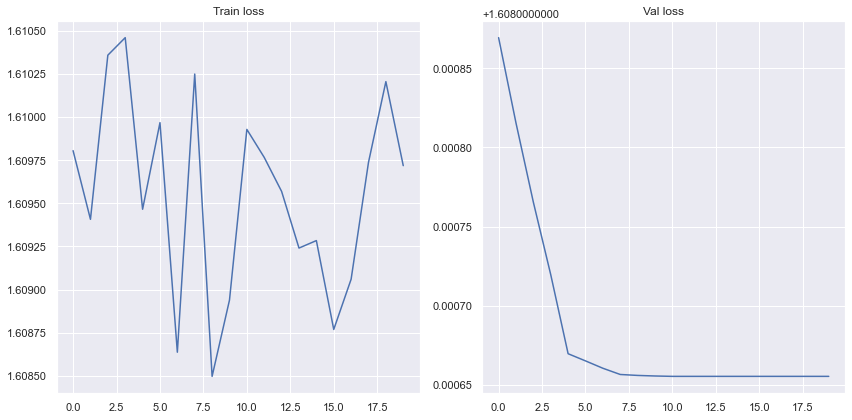

In [47]:
show_loss(rnn_history)

In [48]:
pred_prob = rnn_model.predict(x_test)
rnn_pred = np.argmax(pred_prob, axis=-1)
rnn_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [49]:
accuracy_score(y_test, rnn_pred)

0.19

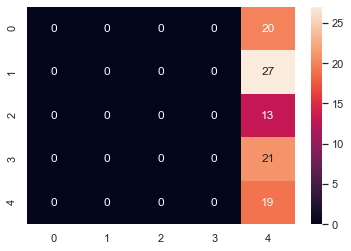

In [50]:
cm = confusion_matrix(y_test, rnn_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Build model with Transformer
https://keras.io/examples/nlp/text_classification_with_transformer/

In [77]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = x.shape[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [78]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [79]:
num_heads = 2 # Number of attention heads
ff_dim = 32   # Hidden layer size in feed forward network inside transformer

In [80]:
transformer_model = Sequential([
    Input(shape=(max_len,)),
    TokenAndPositionEmbedding(max_len, vocab_len, embedding_dim),
    TransformerBlock(embedding_dim, num_heads, ff_dim),
    GlobalAveragePooling1D(),
    Dense(dense_units_list[0], activation='relu'),
    Dropout(dropout_rate),
    Dense(dense_units_list[1], activation='softmax')
])
transformer_model.summary()

<class 'tensorflow.python.framework.ops.Tensor'>
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_and_position_embedding (None, 245, 16)           17392     
_________________________________________________________________
transformer_block_4 (Transfo (None, 245, 16)           3296      
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 325       
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
